<a href="https://colab.research.google.com/github/cantaruttim/Learning_Python/blob/main/machine_learning_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

### Métricas

#### 1. Precisão: 

$$Precisão = \frac{TP}{TP + FP}$$
TP = Todos os verdadeiros positivos; FP = número de falsos positivos


#### 2. Revocação:

$$Revocação = \frac{TP}{TP + FN}$$
FN = é o número de falsos negativos


#### 3. Pontuação F1:

$$F1 = \frac{2}{\frac{1}{precisão} + \frac{1}{revocação}} = 2 * \frac{precisão * revocação}{precisão + revocação} = \frac{TP}{TP + \frac{FN + FP}{2}}$$

<br />

Obs¹: A pontuação F1 é a _média harmônica_ da precisão e revocação. Onde a média harmômica dará muito mais peso aos valores mais baixos.

Obs²: Média harmônica é a média harmônica como a quantidade de elementos no conjunto, divida pela soma do inverso dos elementos do conjunto

$$Mh = \frac{n}{\frac{1}{x1} + \frac{1}{x2} + \frac{1}{x3} ... + \frac{1}{xn}}$$

#### Compensação da Precisão/Revocação:

Para cada instância, ele calcula uma pontuação baseada em uma _função de decisão_ e, se essa pontuação for maior que um limiar, ele atribiu a instância à classe positiva, ou então a atribui à classe negativa.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

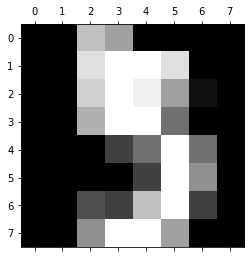

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[5])
plt.show()

In [ ]:
X, y = digits['data'], digits['target']
X.shape, y.shape

((1797, 64), (1797,))

In [ ]:
some_digit = X[5]
print(some_digit)

[ 0.  0. 12. 10.  0.  0.  0.  0.  0.  0. 14. 16. 16. 14.  0.  0.  0.  0.
 13. 16. 15. 10.  1.  0.  0.  0. 11. 16. 16.  7.  0.  0.  0.  0.  0.  4.
  7. 16.  7.  0.  0.  0.  0.  0.  4. 16.  9.  0.  0.  0.  5.  4. 12. 16.
  4.  0.  0.  0.  9. 16. 16. 10.  0.  0.]


In [ ]:
X_train, X_test, y_train, y_test = X[:1797], X[1797:], y[:1797], y[1797:]

import numpy as np

shuffle_index = np.random.permutation(1797)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#### Treinando o classificador

In [ ]:
y_train_5 = (y_train ==  5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=1)
sgd_clf.fit(X_train, y_train_5).predict([some_digit])

array([False])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring='accuracy')

array([0.98664441, 0.98664441, 0.9933222 ])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
# Utilizando a matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[1606,    9],
       [  11,  171]])

In [ ]:
# aplicando a precisão e a revocação e a F1

from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred), f1_score(y_train_5, y_train_pred)

(0.95, 0.9395604395604396, 0.9447513812154695)

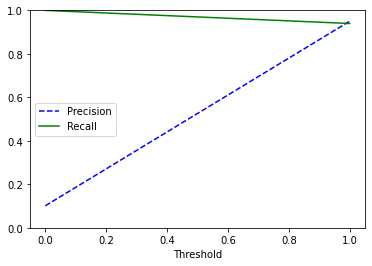

In [ ]:
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve
# Calculando a precisão e a revocação para todos os limites possíveis
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_pred)

# Plotando o gráfico da previsão e revocação

def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="center left")
  plt.ylim([0, 1])

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 10000

y_some_digit_pred = (y_scores > threshold )
print(y_some_digit_pred)

y_train_pred = (y_scores > 70000)

[-48.85864178]
[False]


### Curva **ROC**

plota a _taxa de falsos positivos_ (TPR) >> Revocação

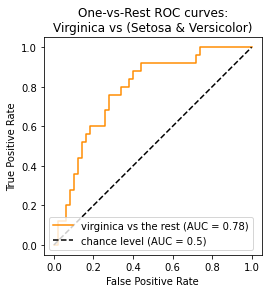

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()